# Digital Image Processing - Assignment 1

### 1. Michael Scott’s Storage Conundrum (15 Points)

**Question 1**

In a color image 1 pixel consists of 3 Byte.  
That means that 5.76 MB = 5760000 Bytes will consist of 5760000/3=1920000 pixels.    
  
Let,  
Height (in pixels) = 3x  
Width (in pixels) = 4x  
Total pixels = 12x<sup>2</sup>  
12 * x<sup>2</sup> = 1920000   
x = $\sqrt{\frac{1920000}{12}}$  
x = $\sqrt{160000}$  
x = 400 pixels  
Height = 3 * 400 = 1200 pixels  
Width = 4 * 400 = 1600 pixels  


**Question 2**  
  
Height of image = 5200 pixels  
Width of image = 5200 pixels    
Total pixels in 1 image = 5200 * 5200 = 27040000 pixels  
Total pixels in 2000 images = 27040000 * 2000 = 54080000000 pixels  

Also, 64GB = 64 * 10<sup>9</sup> * 8 bits= 512000000000 bits 

<u> Part-A </u>  
In B&W images, 1 pixel = 1 bit.    
So 1 image will consist of 54080000000 * 1 = 54080000000 bits.  
Number of memory cards needed = ceil (54080000000/512000000000) = ceil(0.105625) = 1  
  
<u> Part-B </u>  
In grey scale images, 1 pixel = 8 bits.    
So 1 image will consist of 54080000000 * 8 = 432640000000 bits.  
Number of memory cards needed = ceil (432640000000/512000000000) = ceil(0.845) = 1  
  
<u> Part-C </u>  
In grey scale images, 1 pixel = 24 bits.    
So 1 image will consist of 54080000000 * 24 = 1297920000000 bits.  
Number of memory cards needed = ceil (1297920000000/512000000000) = ceil(2.535) = 3  

**Question 3**   

Some code to understand the scenario. Please check the outputs.


   Image of an apple consisting of 60x60 apples, displayed over an area of 1x1 units:


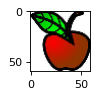


   Image of same apple (i.e. same number of pixels) consisting, displayed over an area of 8x8 units:


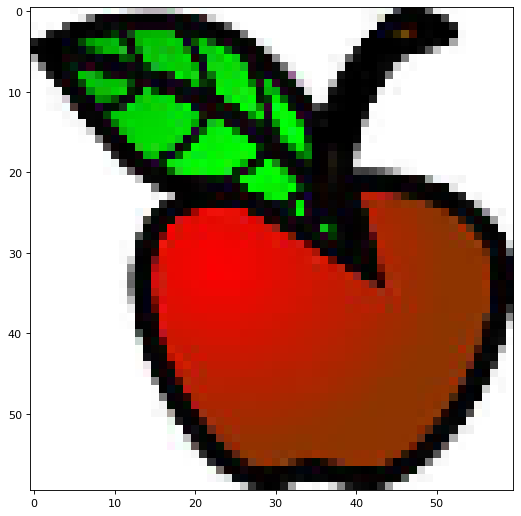

In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

img = cv2.imread('../imgs/index.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (60, 60))

figure(figsize=(1, 1), dpi=80)
plt.imshow(img)
print("\n   Image of an apple consisting of 60x60 apples, displayed over an area of 1x1 units:")
plt.show()

figure(figsize=(8, 8), dpi=80)
plt.imshow(img)

print("\n   Image of same apple (i.e. same number of pixels) consisting, displayed over an area of 8x8 units:")
plt.show()

As we can see, individual pixels are not distinguishable in the first image but are distinguishable in the second image.  

So since Andy and Dwight saw the image on their desktop, the resolution was satisfactory since the display size was smaller. The area of an individual pixel was small and not distinguishable by the naked eye. But when they printed the same number of pixels over a larger area, the area per pixel increased considerably and now was detectable by the naked eye. So to tackle this, they would want the area per pixel to be less. Hence, they'll need more pixels which means an even larger resolution.

### 2. Threat Level Midnight (20 Points)

How does the green screen help in this case?  
The green screen helps since the image's background is now plain, and to separate the foreground from the background, we can directly remove some ranges of colours instead of using more complicated segmentation algorithms like Grabcut.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def most_frequent_color(img):
    unique, counts = np.unique(img.reshape(-1, 3), axis=0, return_counts=True)
    return unique[np.argmax(counts)]

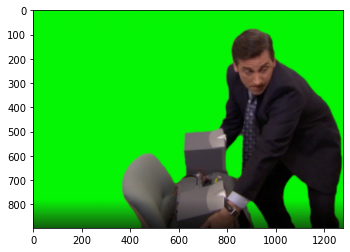

Most frequent color (RGB) = [  5 246   5]


In [4]:
img = cv2.imread("../imgs/foreground.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

print(f"Most frequent color (RGB) = {most_frequent_color(img)}")

In [5]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[0].set_title("Foreground Image")
    ax[1].imshow(img_2)
    ax[1].set_title("Background Image")
    f.tight_layout()
    plt.show()

In [6]:
def mergeImage(img_fg, img_bg):
    
    clr = most_frequent_color(img)
    std = 1.5 * np.std(img[1].flatten())
    std = int(std)

    img_fg = cv2.resize(img_fg, (640, 360))
    img_bg = cv2.resize(img_bg, (640, 360))

    l_bound = np.array(clr - [100, std, 100])
    u_bound = np.array(clr + [100, std, 100])

    mask = (img_fg[:,:,0]<=u_bound[0]) & (img_fg[:,:,1]<=u_bound[1]) & (img_fg[:,:,2]<=u_bound[2]) & (img_fg[:,:,0]>=l_bound[0]) & (img_fg[:,:,1]>=l_bound[1]) & (img_fg[:,:,2]>=l_bound[2])

    masked_image = np.copy(img_fg)
    masked_image[mask != 0] = [0, 0, 0]
    background = img_bg[0:360, 0:640]
    background[mask == 0] = [0, 0, 0]
    final_image = background + masked_image

    plt.imshow(final_image)
    plt.title('Merged Image')
    plt.show()


   The foreground and background images are:


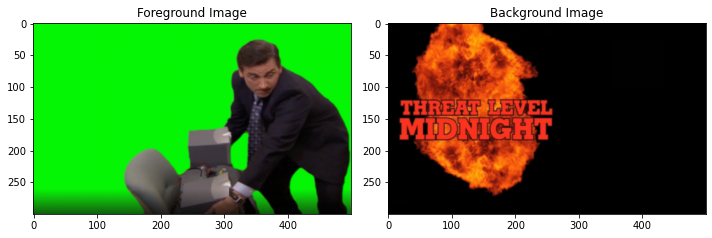

In [7]:
img_fg = cv2.imread("../imgs/foreground.png")
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGR2RGB)

img_bg = cv2.imread("../imgs/background.png")
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)

dim = (500, 300)
img_fg = cv2.resize(img_fg, dim, interpolation = cv2.INTER_AREA)
img_bg = cv2.resize(img_bg, dim, interpolation = cv2.INTER_AREA)

print("\n   The foreground and background images are:")
show_img_compar(img_fg, img_bg)

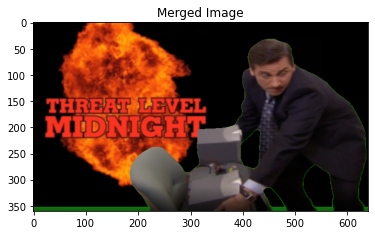

In [8]:
mergeImage(img_fg, img_bg)

### 3. Broken Copier and Linear Transforms (30 Points)

In [9]:
# each element of coeff contains [k1, k2, a, b]
def piecewiseLinTransform(img, coeff):
    img = img[:,:,0]
    img = img.astype(np.float32)/255
            
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            for _ in coeff:
                if img[x][y]>=_[0] and img[x][y]<=_[1]:
                    img[x][y] = _[2]*img[x][y] + _[3]
                 
    img = img*255
    img = img.astype(np.uint8)
    img = np.stack((img,)*3, axis=-1)
    return img

In [ ]:
pam1 = cv2.imread('../imgs/pam1.png')

transformation_coeff = [[0.0, 0.2, 2.0, 0.1], 
                        [0.2, 0.4, -1.0, 0.7], 
                        [0.4, 1.0, 1.0, -0.1]]

pam1_transformed = piecewiseLinTransform(pam1, transformation_coeff)

plt.imshow(pam1)
plt.title("Original image")
plt.show()

plt.imshow(pam1_transformed)
plt.title("Transformed image")
plt.show()

In [ ]:
pam2 = cv2.imread('../imgs/pam2.png')

transformation_coeff = [[0.0, 0.2, 0.0, 0.0],
                        [0.2, 0.4, 0.0, 0.2],
                        [0.4, 0.6, 0.0, 0.4],
                        [0.6, 0.8, 0.0, 0.6],
                        [0.8, 1.0, 0.0, 0.8]]

pam2_transformed = piecewiseLinTransform(pam2, transformation_coeff)

plt.imshow(pam2)
plt.title("Original image")
plt.show()

plt.imshow(pam2_transformed)
plt.title("Transformed image")
plt.show()

In [ ]:
# util function to get gray-scale image from RGB image
def convert_to_grey(image1):

    blue_channel  = image1[:,:,0]
    green_channel = image1[:,:,1]
    red_channel   = image1[:,:,2]
    
    # Taking intensity value as a weighted sum of RGB
    grey_img = 0.3*red_channel + 0.59*green_channel + 0.11*blue_channel
    grey_img = np.stack((grey_img,)*3, axis=-1)
    grey_img = grey_img.astype(int)

    return grey_img

In [ ]:
# Steps have been explained in the comments

# Read the color image
image1 = cv2.imread('../imgs/Q3.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Displayed the color image
plt.title("Original Image")
plt.imshow(image1)
plt.show()

# Converting the RGB image to gray-scale image
grey_img = convert_to_grey(image1)
plt.title("Black and White Image")
plt.imshow(grey_img)
plt.show()

# Got the transformation function coefficients from the graph plotted later
transformation_coeff = [[0.0, 0.4, 0.0, 0.5],
                        [0.0, 0.6, 0.5, 1.0]]

# Calling the transformation function
img_transformed = piecewiseLinTransform(grey_img, transformation_coeff)

# Plotting the transformed image
plt.imshow(img_transformed)
plt.title("Transformed image")
plt.show()

In [ ]:
# These imports are only for plotting the transformation function used on the above image
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines = [[(0, 0.4), (0.5, 0.4)], [(0.5, 0.4), (0.5, 0.6)], [(0.5, 0.6), (1, 0.6)]]

print("\n   The transformation function used is: ")
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

### 4. Slice Off the Unnecessary (50 Points)

In [ ]:
def bitSlice(im, k):
    im  = im[:,:,0]
    hoe = 1<<(k-1)
    im = im&hoe
    im = np.stack((im,)*3, axis=-1)
    return im

In [ ]:
images_list = ['rupee.jpg', 'securityThreat.jpg', 'pepper.jpg']

print("\n   Original Images:")
plt.figure(figsize=(15, 8)) 
for cnt, image in enumerate(images_list):
    img = cv2.imread('../imgs/'+image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, cnt+1)
    plt.imshow(img)
    plt.title(image)
plt.show()

print("\n   Gray-Scale images:")
plt.figure(figsize=(15, 8)) 
for cnt, image in enumerate(images_list):
    img = cv2.imread('../imgs/'+image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    grey_img = convert_to_grey(img)
    plt.subplot(1, 3, cnt+1)
    plt.imshow(grey_img)
plt.show()

for bit in range(1, 9):
    print(f"\n   Bit-plane: {bit}")
    plt.figure(figsize=(15, 8)) 
    for cnt, image in enumerate(images_list):
        img = cv2.imread('../imgs/'+image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        grey_img = convert_to_grey(img)
        sliced_img = bitSlice(grey_img, bit)
        plt.subplot(1, 3, cnt+1)
        plt.imshow(sliced_img, cmap='gray')
    plt.show()

In [ ]:
def imgBitQuantizer(im, k):
    return im >> (8-k)

In [ ]:
images_list = ['rupee.jpg', 'securityThreat.jpg', 'pepper.jpg']

for bit in range(1, 9):
    
    print(f"\n   Quantizing image to {bit} bit(s)")
    
    cnt=1
    plt.figure(figsize=(12, 6)) 
    for image in images_list:

        img = cv2.imread('../imgs/'+image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        grey_img = convert_to_grey(img)
        grey_img = grey_img[:,:,0]
        sliced_img = imgBitQuantizer(grey_img, bit)
        plt.subplot(1, 3, cnt)
        plt.imshow(sliced_img,cmap = 'gray')
        cnt+=1

    plt.show()

**Observations for 4.2 and 4.4**  
The results obtained in Question 4.2 show that the most significant bits contain most of the information in the image. In contrast, the lower bit planes include minor adjustments to the overall picture. We can see from Question 4.4 that the results for 6, 7, and 8 bits aren't very different to the naked eye. From this, we can infer that the information added by the lowest 3-bit planes is less significant, which is in sync with the observation from Question 4.2.

**[Bonus] Applications of bit-plane slicing**  
* Information Compression: As can be seen from Question 4.4, the images look more or less the same when using 6, 7, or 8 bits. Hence, we can slice off the least significant bit planes to save storage space while not losing much information. Therefore, one can use this trick to compress images.
* Image Animation: It can be observed that images that have been quantized to 1 or 2 bits are very smooth and don't contain any "minor" details. The overall look is very artificial and hence can be used to create an animated version of the image.

### 5. Demystifying Magical Transformations (65 Points)

In [ ]:
img = cv2.imread('../imgs/scrantonAreal.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = img[:,:,0]

plt.imshow(grey_img,cmap = 'gray')
plt.show()

In [ ]:
def powerLawTransform(im, gamma):
    y = im**gamma
    return (y/max(y.flatten())*255).astype(int)

hoe = powerLawTransform(grey_img, 0.35)
plt.imshow(hoe, cmap = 'gray')
plt.show()

plt.scatter(grey_img.flatten(), hoe.flatten())
plt.xlabel("INPUT")
plt.ylabel("OUTPUT}")
plt.show()

hoe = powerLawTransform(grey_img, 0.28)
plt.imshow(hoe, cmap = 'gray')
plt.show()

plt.scatter(grey_img.flatten(), hoe.flatten())
plt.xlabel("INPUT")
plt.ylabel("OUTPUT}")
plt.show()

In [ ]:
def hehe(im):
    y = np.log(1+im.astype(float))
    return (y/max(y.flatten())*255).astype(int)

hoe = hehe(grey_img)
plt.imshow(hoe,cmap = 'gray')
plt.show()

plt.scatter(grey_img.flatten(), hoe.flatten())
plt.xlabel("INPUT")
plt.ylabel("OUTPUT}")
plt.show()

In [ ]:
img = cv2.imread('../imgs/scrantonAreal.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = img[:,:,0]
print(grey_img.shape, grey_img.shape[0]*grey_img.shape[1])
unique, counts = np.unique(grey_img, return_counts=True)
a = dict(zip(unique, counts))
a[0]

In [ ]:
img = cv2.imread('../imgs/tripGrpPhoto.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = img[:,:,0]

plt.imshow(grey_img,cmap = 'gray')
plt.show()

hoe = powerLawTransform(grey_img, 8.5)
plt.imshow(hoe, cmap = 'gray')
plt.show()

plt.scatter(grey_img.flatten(), hoe.flatten())
plt.xlabel("INPUT")
plt.ylabel("OUTPUT}")
plt.show()

In [ ]:
def histogram_equilization(im):
    im = im.astype(float)
    im = im-min(im.flatten())
    im = im/max(im.flatten())*255.0
    im = im.astype(int)
    
    unique, counts = np.unique(im, return_counts=True)
    a = dict(zip(unique, counts))
    
    gg = {}
    prob = 0
    tot = im.shape[0]*im.shape[1]
    
    for i in range(256):
        if i in a.keys():
            prob = prob + a[i]/tot
        gg[i] = 255*prob
        
    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            im[x][y] = gg[im[x][y]]
    
    return im
    
img = cv2.imread('../imgs/Same_picture.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = convert_to_grey(img)

plt.imshow(grey_img)
plt.show()

grey_img = grey_img[:,:,0]
gg = histogram_equilization(grey_img)

plt.imshow(grey_img, cmap='gray')
plt.show()

In [ ]:
def stylize(im1, im2):
    
    unique, counts = np.unique(im2, return_counts=True)
    a = dict(zip(unique, counts))
    print(a)
    
    gg = {}
    prob = 0
    tot = im2.shape[0]*im2.shape[1]
    
    for i in range(256):
        if i in a.keys():
            prob = prob + a[i]/tot
        gg[i] = 255*prob
        
    for x in range(im1.shape[0]):
        for y in range(im1.shape[1]):
            im1[x][y] = gg[im1[x][y]]
            
    unique, counts = np.unique(im1, return_counts=True)
    a = dict(zip(unique, counts))
    print(a)
    
    return im1
    
img = cv2.imread('../imgs/Creed.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = convert_to_grey(img)

imgx = cv2.imread('../imgs/Texture.jpg')
imgx = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_imgx = convert_to_grey(imgx)

plt.imshow(grey_img)
plt.show()

grey_img = grey_img[:,:,0]
grey_imgx = grey_imgx[:,:,0]
gg = stylize(grey_img, grey_imgx)

plt.imshow(gg, cmap='gray')
plt.show()

In [ ]:
plt.hist(gg.flatten())

In [ ]:
def padded_img(img, k):
    [ogh, ogw] = img.shape
    sz = k//2
    gg = np.zeros((img.shape[0] + 2*sz, img.shape[1] + 2*sz))
    gg[sz:sz+ogh,sz:sz+ogw] = img
    return gg

In [ ]:
def meanFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            sm=0
            for i in range(k):
                for j in range(k):
                    sm += img[x+i][y+j]
#             sm = np.sum(img[x:x+k,y:y+k])
            sm = sm/(k*k)
            sm = int(sm)
            res[x][y]+=sm
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

In [ ]:
image = cv2.imread('../imgs/Q3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grey_img = convert_to_grey(image)

plt.imshow(grey_img)
plt.title("Original Image")
plt.show()

mean_img = meanFilter(grey_img, 5)
plt.title(f"Mean Image with K={5}")
plt.imshow(mean_img)
plt.show()

In [ ]:
def effMeanFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    
    img = padded_img(img, k)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if x>0: img[x][y] += img[x-1][y]
            if y>0: img[x][y] += img[x][y-1]
            if x>0 and y>0: img[x][y] -= img[x-1][y-1]
    
    for x in range(k-1, img.shape[0]):
        for y in range(k-1, img.shape[1]):
            sm = img[x][y]
            if x>=k: sm = sm - img[x-k][y]
            if y>=k: sm = sm - img[x][y-k]
            if x>=k and y>=k: sm = sm + img[x-k][y-k]
            sm = sm/(k*k)
            sm = int(sm)
            res[x-(k-1)][y-(k-1)]+=sm

    res = res.astype(np.uint8)
    res = np.stack((res,)*3, axis=-1)
    return res    

In [ ]:
image = cv2.imread('../imgs/Q3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grey_img = convert_to_grey(image)

plt.imshow(grey_img)
plt.title("Original Image")
plt.show()

mean_img = effMeanFilter(grey_img, 5)
plt.title(f"Mean Image with K={5}")
plt.imshow(mean_img)
plt.show()

In [ ]:
mean1 = meanFilter(grey_img, 5)
mean2 = effMeanFilter(grey_img, 5)
print(np.array_equal(mean1, mean2))

In [ ]:
import time
def current_milli_time():
    return round(time.time() * 1000)

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
dimensions = [(64, 64), (128, 128), (256, 256), (1024, 1024)]
colors = ['g', 'y', 'b', 'r']

kernel_sizes = [3, 5, 7, 9]

image = cv2.imread('../imgs/Q3.jpg', 1)
grey_img = image

for dim in range(len(dimensions)):
    
    grey_img = cv2.resize(grey_img, dimensions[dim])
    t_def = []
    t_eff = []

    for k in kernel_sizes:

        last = current_milli_time()
        mean_img = meanFilter(grey_img, k)
        t_def.append(current_milli_time()-last)

        last = current_milli_time()
        mean_img = effMeanFilter(grey_img, k)
        t_eff.append(current_milli_time()-last)

    plt.plot(kernel_sizes, t_def, color=colors[dim])
    plt.plot(kernel_sizes, t_eff, color=colors[dim], linestyle = 'dashed')

plt.legend(['64x64 Default', 
            '64x64 Efficient',
            '128x128 Default', 
            '128x128 Efficient',
            '256x256 Default', 
            '256x256 Efficient',
            '1024x1024 Default', 
            '1024x1024 Efficient'])
plt.xlabel('Filter neighbourhood (K)')
plt.ylabel('Run-time (milli-sec)')
plt.show()

In [ ]:
image = cv2.imread('../imgs/testPattern.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

k_vals = [5, 9, 15, 35]

for k in k_vals:
    
    f, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    mean_img = effMeanFilter(image, k)
    ax[0].imshow(mean_img)
    
    histr = cv2.calcHist([mean_img],[0],None,[256],[0,256])
    ax[1].plot(histr)
    
    plt.show()

In [ ]:
def pascal_row(k):
    ans = [1]
    for row in range(1, k):
        ans = ans[1:] + ans[:-1]
        ans = np.concatenate(([1], ans, [1]))
    return np.array(ans)

In [ ]:
def approx1DGaussFilter1(k):
    gg = pascal_row(k)
    gg = gg/np.sum(gg)
    mid = gg.shape[0]//2
    return [gg, 1/(np.sqrt(2*np.pi)*gg[mid])]

In [ ]:
not use any external library other than numpy for implementing any of the tasks.[window, std] = approx1DGaussFilter1(11)

In [ ]:
k_vals = []
std = []

for k in range(3, 51, 2):
    k_vals.append(k)
    std.append(approx1DGaussFilter1(k)[1])

In [ ]:
plt.scatter(k_vals, std)
plt.show()

In [ ]:
def approx1DGaussFilter2(std):
    range_of_x = np.array([1.5, 2.5, 3.5])
    k = std * range_of_x
    k = np.ceil(k)
    k = k + (k+1)%2
    return k
    
approx1DGaussFilter2(5.34543)

In [ ]:
def gauss_2D(x, y, std):
    return np.exp(-(x*x+y*y)/(2*std*std))/np.sqrt(2*np.pi*std*std)

def gaussKernelGenerator(k, var):
    res = np.zeros((k, k))
    std = np.sqrt(var)
    for x in range(k):
        for y in range(k):
            res[x][y] += gauss_2D(x-(k//2), y-(k//2), std)
    res = res/np.sum(res)
    return res

a1 = gaussKernelGenerator(3, 0.5625)
a1

In [ ]:
def gauss_1D(x, std):
    return np.exp(-(x*x)/(2*std*std))/(std*np.sqrt(2*np.pi))

def approx2DGaussFilter(std):
    k = np.ceil(2.5*std)
    k = k+(k+1)%2
    k = k.astype(int)
    util = np.linspace(-(k//2), k//2, num=k)
    util = gauss_1D(util, std)
    util = np.array([util])
    res = util.T@util
    res = res/np.sum(res)
    return res

a2 = approx2DGaussFilter(0.75)
a2

In [ ]:
np.array_equal(a1, a2)

In [ ]:
def useless(std):
    kernel = approx2DGaussFilter(std)
    size = kernel.shape[0]
    return (100*np.sum(kernel<(1/255.0)))/(size*size)

std_vals = np.linspace(0.2, 12, num=30)
useless_vals = []
for std in std_vals: useless_vals.append(useless(std))
plt.scatter(std_vals, useless_vals)
plt.xlabel("sigma")
plt.ylabel("%age of useless")
plt.show()

In [ ]:
def padded_img(img, k):
    [ogh, ogw] = img.shape
    sz = k//2
    gg = np.zeros((img.shape[0] + 2*sz, img.shape[1] + 2*sz))
    gg[sz:sz+ogh,sz:sz+ogw] = img
    return gg

def convolve(img, kernel):
    
    k = kernel.shape[0]
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= min(abs(np.sum(img[x:x+k,y:y+k]*kernel)), 255.0)
    
    res = res.astype(np.uint8)
    res = np.stack((res,)*3, axis=-1)
    return res

def gaussianFilter(im, var, k):
    kernel = gaussKernelGenerator(k, var)
    return convolve(im, kernel)

In [ ]:
im = cv2.imread('../imgs/testPattern.jpg')
plt.imshow(im)
plt.show()

bl = gaussianFilter(im, 30, 15)
plt.imshow(bl)
plt.show()

In [ ]:
k_vals = np.array([5, 9, 15, 35])
s_vals = np.array([3, 6, 12])
f, ax = plt.subplots(k_vals.shape[0], s_vals.shape[0], figsize=(16, 16))

for x, k in enumerate(k_vals):
    for y, s in enumerate(s_vals):
        plt.subplot(k_vals.shape[0], s_vals.shape[0], s_vals.shape[0]*x+y+1)
        plt.imshow(gaussianFilter(im, s*s, k))

plt.show()

In [ ]:
# k chota hai toh variance ka effect nahi dikh raha hai

In [ ]:
im = cv2.imread('../imgs/testPattern.jpg')
# plt.imshow(im)
plt.imshow(im, cmap = 'hot')
# gaussianFilter(im, 30, 15)
plt.imshow(gaussianFilter(im, 30, 15), cmap = 'hot')
plt.show()

In [ ]:
im = cv2.imread('../imgs/testPattern.jpg')

kernel1 = approx2DGaussFilter(1.75)
im1 = convolve(im, kernel1)

util = np.array([approx1DGaussFilter1(5)[0]])
kernel2 = util.T @ util
im2 = convolve(im, kernel2)

diff = abs(im1-im2)
# diff = diff[:,:,0]
plt.imshow(diff, cmap='hot')
plt.show()

In [ ]:
print(100*np.sum(im1==im2)/(im1.shape[0]*im1.shape[1]*im1.shape[2]), '%')

In [ ]:
im = cv2.imread('../imgs/noisy1.jpeg')
plt.imshow(im)
plt.show()

In [ ]:
def MinFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= np.min(img[x:x+k,y:y+k])
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

def MedianFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= np.median(img[x:x+k,y:y+k])
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

def MaxFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= np.max(img[x:x+k,y:y+k])
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

images = ['../imgs/noisy1.jpeg', '../imgs/noisy2.jpeg', '../imgs/noisy3.jpeg']
k_vals = np.array([3, 5, 7, 9])

for im in images:
    print("IMAGE = ", im.split('/')[-1])
    im = cv2.imread(im)
    plt.imshow(im)
    plt.show()
    for i, k in enumerate(k_vals):
        print("K = ", k)
        f, ax = plt.subplots(1, 3, figsize=(16, 16))
        plt.subplot(1, 3, 1)
        plt.imshow(MinFilter(im, k))
        plt.subplot(1, 3, 2)
        plt.imshow(MedianFilter(im, k))
        plt.subplot(1, 3, 3)
        plt.imshow(MaxFilter(im, k))
        plt.show()

In [ ]:
def MedianFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    for y in range(res.shape[1]):
        for x in range(res.shape[0]):
            res[x][y]+= np.median(img[x:x+k,y:y+k])
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

def effMedianFilter(img, k):
    
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    
    for y in range(res.shape[1]):
        
        lol = img[0:k,y:y+k].flatten()
        res[0][y]+= np.median(lol)
        
        for x in range(1, res.shape[0]):
            lol = np.hstack((lol[k:], img[x+k-1,y:y+k]))
            res[x][y]+= np.median(lol)
    
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

im = cv2.imread('../imgs/noisy1.jpeg')
plt.imshow(im)
plt.show()

last = current_milli_time()
im1 = MedianFilter(im, 11)
print(current_milli_time()-last)
plt.imshow(im1)
plt.show()

last = current_milli_time()
im2 = effMedianFilter(im, 11)
print(current_milli_time()-last)
plt.imshow(im2)
plt.show()

In [ ]:
np.array_equal(im1, im2)

In [ ]:
def add_to_histogram(hist,vect):
    for i in vect: hist[i] += 1

def remove_from_histogram(hist,vect):
    for i in vect:
        hist[i] -= 1

def get_median_from_histogram(hist):
    s = 0
    r = len(hist)
    med_index = sum(hist)//2 + 1
    ans = 0
    for i in range(r):
        s = s + hist[i]
        if(s >= med_index):
            ans = i
            break
    return ans

def efficient_median_filter(img,k):
    
    filtered_image = np.zeros(img.shape)
    (l,b) = img.shape
    sz = k//2
    
    for i in range(img.shape[0]):
        hist = [0 for i in range(256)]
        for j in range(img.shape[1]):
            
            left = j - sz
            right = j + sz
            up = i - sz
            down = i + sz
            
            if(up >= 0 and down < l and left >= 0 and right < b):
                
                if(left - 1 >=  0):
                    last_left = img[up : down + 1,left - 1]
                    remove_from_histogram(hist,last_left.astype(np.int32))
                    new_right = img[up : down + 1,right]
                    add_to_histogram(hist,new_right.astype(np.int32))
                    filtered_image[i,j] = get_median_from_histogram(hist)
                
                else:
                    for col in range(left,right + 1):
                        vect = img[up : down + 1,col]
                        add_to_histogram(hist,vect.astype(np.int32))
                    filtered_image[i,j] = get_median_from_histogram(hist)
                        
            else:
                filtered_image[i,j] = img[i,j]
    return filtered_image.astype(np.int32)

In [ ]:
last = current_milli_time()
im3 = efficient_median_filter(im[:,:,0], 11)
print(current_milli_time()-last)
im3 = np.stack((im3,)*3, axis=-1)
plt.imshow(im3, cmap='gray')
plt.show()

In [ ]:
im = cv2.imread('../imgs/office.jpg')
im = convert_to_grey(im)
plt.imshow(im)
plt.show()

In [ ]:
def gradient_convolve(img, kernel):
    
    k = kernel.shape[0]
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= np.sum(img[x:x+k,y:y+k]*kernel)
    
    res = res.astype(np.float64)
    res = np.stack((res,)*3, axis=-1)
    return res


def edge_detection(im, filter_x, filter_y):
    
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    
    gx = gradient_convolve(im, filter_x)
    gy = gradient_convolve(im, filter_y)

    magnitude = np.sqrt(gx*gx+gy*gy)
    mn = np.min(magnitude)
    mx = np.max(magnitude)
    magnitude = ((magnitude-mn)/(mx-mn))*255
    magnitude = magnitude.astype(np.uint8)
    ax[0].imshow(magnitude)
    
    gx = gx[:, :, 0]
    gy = gy[:, :, 0]
    ax[1].imshow(im)
    for i in range(0, im.shape[0], 50):
        for j in range(0, im.shape[1], 50):
            if gx[i, j]>0 and gy[i, j]>0:
                plt.quiver(j, i, gx[i, j], gy[i, j], color = 'r')
            
    f.tight_layout()
    plt.show()

In [ ]:
roberts_x = np.array([[0, 1], [-1, 0]])
roberts_y = np.array([[1, 0], [0, -1]])
edge_detection(im, roberts_x, roberts_y)

In [ ]:
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
edge_detection(im, prewitt_x, prewitt_y)

In [ ]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
edge_detection(im, sobel_x, sobel_y)

In [ ]:
laplacian_1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
gx = convolve(im, laplacian_1)
plt.imshow(gx)
plt.show()

In [ ]:
laplacian_2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
gx = convolve(im, laplacian_2)
plt.imshow(gx)
plt.show()

In [ ]:
prewitt_x = np.array([[-2, -1, 0, 1, 2],
                      [-2, -1, 0, 1, 2],
                      [-2, -1, 0, 1, 2],
                      [-2, -1, 0, 1, 2],
                      [-2, -1, 0, 1, 2]])

prewitt_y = np.array([[2, 2, 2, 2, 2],
                      [1, 1, 1, 1, 1],
                      [0, 0, 0, 0, 0],
                      [-1, -1, -1, -1, -1],
                      [-2, -2, -2, -2, -2]])

edge_detection(im, prewitt_x, prewitt_y)

In [ ]:
gaussian_approx = np.array([[1., 4., 6., 4., 1.]])
x_derivative = np.array([[-2, -1, 0, 1, 2]])

sobel_x = gaussian_approx.T @ x_derivative
sobel_y = sobel_x.T
np.flip(sobel_y, 0)

edge_detection(im, sobel_x, sobel_y)

In [ ]:
im = cv2.imread('../imgs/galaxies.jpeg')
plt.imshow(im)
plt.show()

im = im[:,:,0]
im = im>130
im = im.astype(np.uint8)
im = im*255
im = np.stack((im,)*3, axis=-1)

im = effMeanFilter(im, 45)

im1 = im>200
im1 = im1.astype(np.uint8)
im1 = im1*255
plt.imshow(im1, cmap='gray')
plt.show()